In [1]:
import sys
sys.path.append('../')

import controller
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(149)

ci = controller.Car_Interface()

ci.set_gear(ci.FORWARD)

def apply_alternating_controls(ci, num, time_per):

    commands = []
    cmdtype = [ci.BRAKE, ci.ACCELERATOR]
    cmd_name = ['brake', 'accelerate']
    
    

    '''
    commands should be a list of tuples (cmd_type, amt) where
    cmd_type is either 'accelerate' or 'brake' and amt is a
    random number between 0 and 1 that denotes how much the
    corresponding pedal was depressed.
    
    In total there should be num commands and each should
    be executed for time_per seconds.  The car interface log
    will be used later for accessing the data, so make sure
    to actually execute the commands on the vehicle.
    (see controller.py)
    '''
    
    #CODE HERE
    for i in range(num):
        cmd = np.random.randint(0,2)
        
        amt = np.random.random()
        commands.append((cmd_name[cmd], amt))
        ci.apply_control_for_time(cmdtype[cmd], amt, time_per)
        ci.log_data()
    return commands


N = 20
TIME_PER = 50
commands = apply_alternating_controls(ci, num = N, time_per = TIME_PER)

for i in range(10):
    print(commands[i][0], f"{commands[i][1] * 100:.2f}%")

accelerate 16.13%
accelerate 86.46%
brake 95.12%
brake 86.10%
brake 95.16%
brake 60.02%
accelerate 28.08%
accelerate 90.20%
brake 64.60%
brake 19.43%


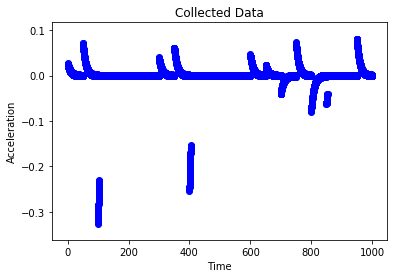

Actual Coefficients:
rolling bias: 0.01
friction: 0.11
accel_weight: 0.1
brake_weight: -0.25
___________________________________________


In [3]:
vel_log = ci.log["velocity"]
acc_log = ci.log["acceleration"]
time_log = ci.log["time"]

NUM_READINGS = len(time_log)
NUM_READINGS_PER = int(NUM_READINGS / N)

filt_times = []
filt_inps = []
filt_outs = []

all_times = []
all_inps = []
all_outs = []

for i in range(NUM_READINGS):
    cmd = commands[int(i / NUM_READINGS_PER)]
    vel = vel_log[i]
    acc = acc_log[i]
    t = time_log[i]
    inp = [0,0,0]

    if (cmd[0] == 'accelerate'):
        '''
        inp = ? should be a list of length 3 corresponding
        to the three input variable in the linear equation
        for determining acceleration
        '''
        inp = [cmd[1], 0, vel]
    elif(cmd[0] == 'brake'):
        '''
        inp = ? remember to order input variables exactly
        as done in the previous statement
        '''
        inp = [0, cmd[1], vel]

    all_inps.append(inp)
    all_outs.append(acc)
    all_times.append(t)

    '''
    At first you can leave this code section blank.
    Once you run Linear Regression on the basic inputs
    and outputs you will notice the regression struggles to
    accurately model data.  Here you will populate the filtered
    lists (filt_inps, filt_outs, filt_times) similar to how
    the all lists are populate above, but censoring out certain
    (input, output) data points that are undesirable.
    '''
    #CODE HERE
    
    if acc > -0.1 :
        filt_inps.append(inp)
        filt_outs.append(acc)
        filt_times.append(t)



plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.show()

print(f"Actual Coefficients:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it.  The variables
should attributes of the car interface object
that correspond to those in the linear
equation presented in class.
'''
print(f"rolling bias: {ci.rolling_bias}")
print(f"friction: {ci.friction_constant}")
print(f"accel_weight: {ci.accelerator_weight}")
print(f"brake_weight: {ci.brake_weight}")
print("___________________________________________")

[ 0.13936931 -0.01708801 -0.15304243] | 0.009978330794298391
Model Fit 0.5616219025963116
Model Predictions:
: 0.13936931289940993
_______: -0.017088010602616065
: -0.153042427644209
rolling bias: 0.009978330794298391
___________________________________________


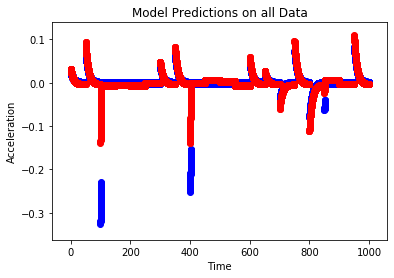

In [4]:
model = LinearRegression()


'''
First fit the model with the generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
(See the coef_ and intercept_ attributes in the LinearRegression
documentation)
'''

#CODE HERE
model.fit(all_inps, all_outs)
fit_score = model.score(all_inps, all_outs)
coef = model.coef_
const = model.intercept_
print(str(coef) + " | " + str(const))

print(f"Model Fit {fit_score}")
print(f"Model Predictions:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it
'''
print(f": {coef[0]}")
print(f"_______: {coef[1]}")
print(f": {coef[2]}")
print(f"rolling bias: {const}")


print("___________________________________________")

plt.clf()
plt.title("Model Predictions on all Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.scatter(all_times, model.predict(all_inps), color = 'r')
plt.show()

Model Fit 0.9118247514106987
_______: 0.10100537197429987
_______: -0.006831988786155498
_______: -0.10347697706583682
const: 0.005183885055391614
___________________________________________


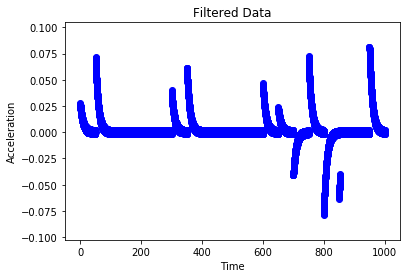

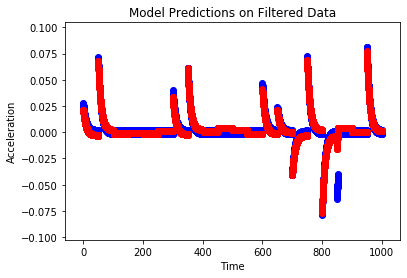

In [5]:
    '''
First fit the model with the filtered generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
Code should be similar to the previous section but now using
the filtered data.
'''
model.fit(filt_inps, filt_outs)
fit_score = model.score(filt_inps, filt_outs)
coef = model.coef_
const = model.intercept_
print(f"Model Fit {fit_score}")
'''
Fill in the blanks as in the previous section
'''
print(f"_______: {coef[0]}")
print(f"_______: {coef[1]}")
print(f"_______: {coef[2]}")
print(f"const: {const}")



print("___________________________________________")

plt.clf()
plt.title("Filtered Data")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()

plt.clf()
plt.title("Model Predictions on Filtered Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.scatter(filt_times, model.predict(filt_inps), color = 'r')
plt.show()